In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime
sb.set()

In [2]:
def removeOut(dataframe):
    altered = pd.DataFrame() 
    for var in dataframe: 
        Q1 = dataframe[var].quantile(0.25) 
        Q3 = dataframe[var].quantile(0.75) 
        IQR = Q3 - Q1 
        altered[var] = dataframe[var][((dataframe[var] > (Q1 - 1.5 * IQR)) & (dataframe[var] < (Q3 + 1.5 * IQR)))] 
        altered = altered.dropna()
    return altered

In [3]:
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [4]:
customerDf = pd.read_csv("https://raw.githubusercontent.com/dcjh/1015_Mini_Project/main/Datasets/cleaned_customer.csv") 

In [5]:
KNN_df = customerDf.loc[:, ['Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Dt_Customer', 'Recency']]

In [6]:
KNN_df['Dt_Customer'] = pd.to_datetime(KNN_df['Dt_Customer'], format='%d-%m-%Y')
KNN_df["CurrentDate"] = datetime.datetime(2021, 1, 1)
KNN_df['numMonths'] = ((KNN_df['CurrentDate'] - KNN_df['Dt_Customer'])/np.timedelta64(1, 'M'))
KNN_df['Recency'] = KNN_df['Recency']/30 #assume 30days in a month

In [7]:
#average purchases over the months
for var in KNN_df.columns[4:10]:
    KNN_df[var] = KNN_df[var]/ (KNN_df["numMonths"] - KNN_df["Recency"])

KNN_df.drop(columns = ['Dt_Customer', 'CurrentDate', "numMonths", "Recency"], inplace = True)

In [8]:
KNN_df

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,58138.0,8,10,4,6.481022,0.898157,5.572659,1.755490,0.898157,0.898157
1,46344.0,1,1,2,0.136519,0.012411,0.074465,0.024822,0.012411,0.074465
2,71613.0,8,2,10,4.867850,0.559917,1.451213,1.268383,0.239964,0.479929
3,26646.0,2,0,4,0.134427,0.048882,0.244412,0.122206,0.036662,0.061103
4,58293.0,5,3,6,2.154818,0.535591,1.469760,0.572957,0.336301,0.186834
...,...,...,...,...,...,...,...,...,...,...
2211,61223.0,9,3,4,7.956164,0.482532,2.042344,0.471310,1.324157,2.771753
2212,64014.0,8,2,5,5.280512,0.000000,0.390186,0.000000,0.000000,0.104049
2213,56981.0,2,3,13,11.323378,0.598593,2.706138,0.399062,0.149648,0.299296
2214,69245.0,6,5,10,5.157396,0.361500,2.578698,0.963999,0.361500,0.735049


In [9]:
KNN_df.describe()

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,4.085289,2.671029,5.800993,3.434783,0.298550,1.889912,0.425897,0.305814,0.494776
std,25173.076661,2.740951,2.926734,3.250785,3.774008,0.453732,2.540929,0.621686,0.466487,0.584823
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,2.000000,0.000000,3.000000,0.277336,0.020148,0.178176,0.031087,0.012748,0.103556
50%,51381.500000,4.000000,2.000000,5.000000,1.982401,0.091109,0.756134,0.135817,0.095060,0.274890
75%,68522.000000,6.000000,4.000000,8.000000,5.736124,0.369209,2.608185,0.559684,0.385290,0.639012
max,666666.000000,27.000000,28.000000,13.000000,17.179104,2.451923,20.074911,3.262791,3.321490,3.693851


In [10]:
KNN_cleaned = removeOut(KNN_df)

In [11]:
KNN_cleaned.describe()

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000
mean,43606.508816,3.475441,1.500000,4.844458,2.239563,0.117246,0.812299,0.168946,0.117938,0.283792
std,17135.627035,2.500919,1.836924,2.792620,3.055528,0.173064,1.146551,0.252275,0.175926,0.299924
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30793.750000,2.000000,0.000000,3.000000,0.159828,0.010916,0.127300,0.022530,0.010576,0.070626
50%,42399.000000,3.000000,1.000000,4.000000,0.707093,0.045866,0.310684,0.071862,0.047080,0.172012
75%,56051.250000,5.000000,2.000000,6.000000,3.131026,0.141793,1.000304,0.200083,0.146769,0.394917
max,90933.000000,11.000000,9.000000,13.000000,13.916021,0.892699,6.183509,1.302875,0.942197,1.427107


In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

predictors = KNN_cleaned.loc[:, ['Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
responses = KNN_cleaned.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

predictors_train, predictors_test, responses_train, responses_test = train_test_split(predictors, responses, random_state = 0, train_size = 0.75)

In [13]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(predictors_train, responses_train)

predicted_responses_train = knn.predict(predictors_train)
predicted_responses_test = knn.predict(predictors_test)
mseTrain = mean_sq_err(responses_train, predicted_responses_train)
mseTest = mean_sq_err(responses_test, predicted_responses_test)


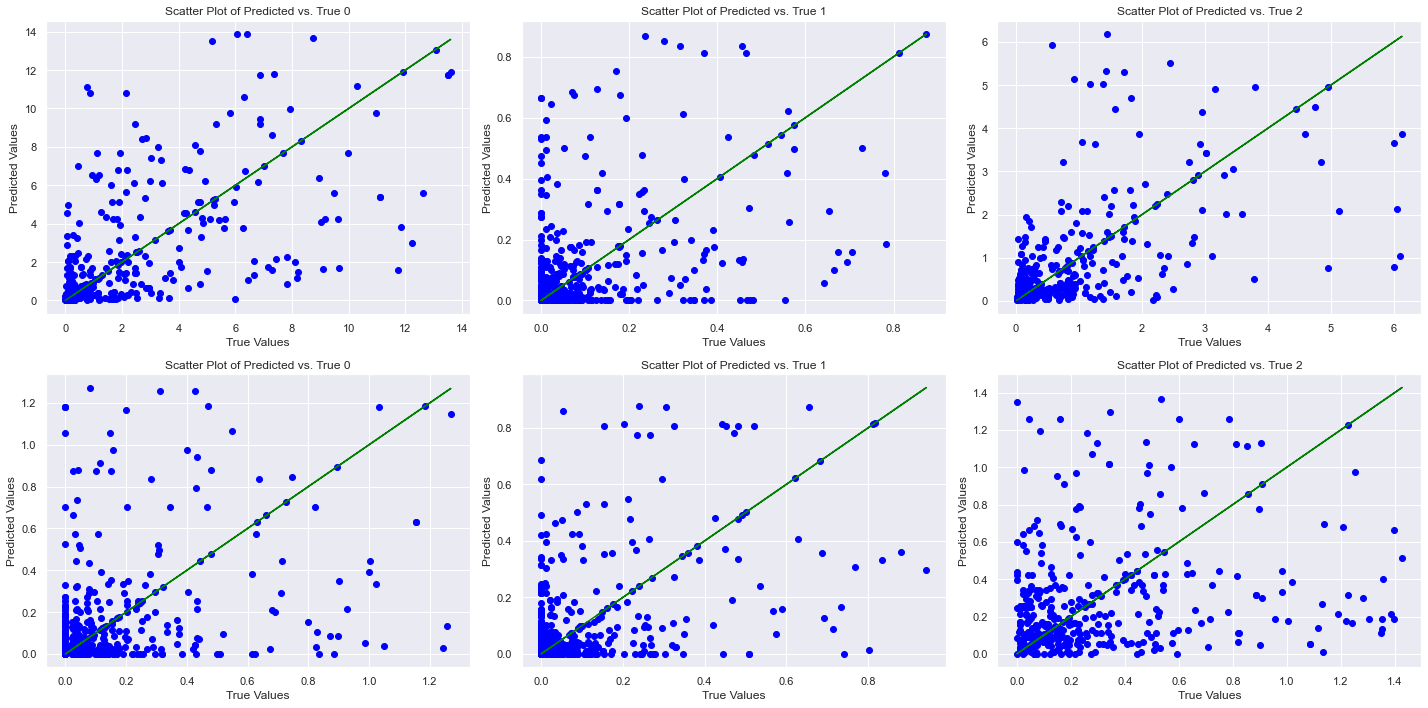

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
    
for i, col in enumerate(responses_test.columns):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index
    ax = axes[row, col]
    ax.scatter(responses_test.values[:, i], predicted_responses_test[:, i], color='blue')
    ax.plot(responses_test.values[:, i], responses_test.values[:, i], color='green')
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title('Scatter Plot of Predicted vs. True {}'.format(col))
    
plt.tight_layout()
plt.show()

In [15]:
print("Goodness of Fit of Model\tTrain Dataset")
print("Explained Variance (R^2) \t:", knn.score(predictors_train, responses_train))
print("Mean Squared Error (MSE) \t:", mseTrain)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTrain))
print()
print("Goodness of Fit of Model\tTest Dataset")
print("Explained Variance (R^2) \t:", knn.score(predictors_test, responses_test))
print("Mean Squared Error (MSE) \t:", mseTest)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTest))

Goodness of Fit of Model	Train Dataset
Explained Variance (R^2) 	: 0.9996656378156006
Mean Squared Error (MSE) 	: 1.6027169369308394e-05
Root Mean Squared Error (RMSE) 	: 0.004003394730639035

Goodness of Fit of Model	Test Dataset
Explained Variance (R^2) 	: -0.1746530495347253
Mean Squared Error (MSE) 	: 1.3178242216999148
Root Mean Squared Error (RMSE) 	: 1.147965252827765
